In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

In [3]:
train_data = pd.read_csv("./data/training.csv")
test_data = pd.read_csv("./data/test.csv")
lookid_data = pd.read_csv("./data/IdLookupTable.csv")
train_data.fillna(method='ffill', inplace=True)

In [4]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [5]:
train_data.shape

(7049, 31)

In [6]:
train_data.tail(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
7048,66.938311,43.42451,31.096059,39.528604,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,73.033339,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,45.90048,82.773096,53 62 67 76 86 91 97 105 105 106 107 108 112 1...


In [7]:
len(train_data), len(test_data)

(7049, 1783)

In [8]:
len(test_data.Image[0].split(' '))

9216

In [9]:
def append_X(X):
    return [np.asarray(image.split(' '), dtype= 'float').reshape(96, 96) for image in X.Image]

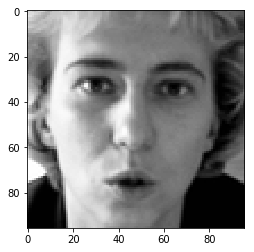

In [10]:
X_train = append_X(train_data) 
plt.imshow(X_train[1],cmap='gray')
plt.show()

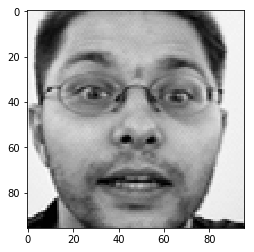

In [11]:
X_test = append_X(test_data) 
plt.imshow(X_test[0],cmap='gray')
plt.show()

In [12]:
# taking keypoints data from csv, except full Image
y = train_data.iloc[:, :-1].values

In [13]:
print(len(X_train))


def keypoints_show(x, y=None):
    plt.imshow(x, 'gray')
    if y is not None:
        points = np.vstack(np.split(y, 15)).T
        plt.plot(points[0], points[1], 'o', color='red')
    plt.axis('off')   


7049


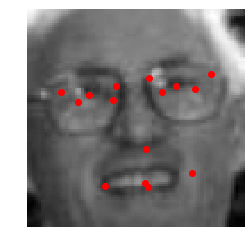

In [14]:
sample_idx = np.random.choice(len(X_train))

y[sample_idx]

keypoints_show(X_train[sample_idx], y[sample_idx])

In [15]:
X = np.array([image.flatten() for image in X_train])

In [16]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [17]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [18]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    print(X.shape, one_column.shape)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [19]:
# linear_regression(X, y[..., 0], 1, 50)

In [45]:
y[..., 0]

array([66.03356391, 64.33293617, 65.05705263, ..., 66.69073171,
       70.96508235, 66.93831111])

In [53]:
reg = linear_model.LinearRegression()
reg.fit(X, y[...,0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
reg.coef_

array([ -614161.02912945,  1844239.72950633, -1158073.9221672 , ...,
         -72534.97244838,   162237.3583347 ,   443803.54751591])

In [64]:
one_column = np.ones((X.shape[0],1))
A = np.concatenate((one_column, X), axis = 1)
A

array([[  1., 238., 236., ...,  70.,  75.,  90.],
       [  1., 219., 215., ...,   1.,   1.,   1.],
       [  1., 144., 142., ...,  78.,  78.,  77.],
       ...,
       [  1.,  74.,  74., ...,  20.,  20.,  20.],
       [  1., 254., 254., ..., 254., 254., 254.],
       [  1.,  53.,  62., ..., 158., 158., 159.]])

In [67]:
b = y[..., 0]
b

array([66.03356391, 64.33293617, 65.05705263, ..., 66.69073171,
       70.96508235, 66.93831111])

In [80]:
beta = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, b))

In [86]:
np.dot(A[0], x)

-175255.2033432126